## **BBC News Scraper**
Este scraper cuenta con una leve automatización para extraer información de las principales páginas que almacenan noticias de BBC News, como Home, Coronavirus, Businnes, tech, science, Estados Unidos y Canada, entre otras.

<a href="https://www.bbc.com/news"><img src=https://upload.wikimedia.org/wikipedia/en/thumb/f/ff/BBC_News.svg/1280px-BBC_News.svg.png  width="320"></img></a>

In [0]:
import requests
from bs4 import BeautifulSoup
from IPython.display import Image
import pandas as pd

In [29]:
url = 'https://www.bbc.com/news'
url_general = 'https://www.bbc.com'
bbc = requests.get(url)
bbc.status_code ## Debe ser 200

200

In [0]:
soup = BeautifulSoup(bbc.text, 'lxml')
print(soup.prettify()) #Estructura de la pagina pricipal

### Extraccion de las secciones

In [31]:
secciones = soup.find('ul', attrs={'class':'gs-o-list-ui--top-no-border nw-c-nav__wide-sections'}).find_all('li') # Secciones menu principal
secciones

[<li class="gs-o-list-ui__item--flush gel-long-primer gs-u-display-block gs-u-float-left nw-c-nav__selected nw-c-nav__wide-menuitem-container"><a class="nw-o-link" href="/news"><span aria-hidden="true">Home</span><span class="gs-u-vh">Home selected</span></a></li>,
 <li class="gs-o-list-ui__item--flush gel-long-primer gs-u-display-block gs-u-float-left nw-c-nav__wide-menuitem-container"><a class="nw-o-link" href="/news/coronavirus"><span>Coronavirus</span></a></li>,
 <li class="gs-o-list-ui__item--flush gel-long-primer gs-u-display-block gs-u-float-left nw-c-nav__wide-menuitem-container"><a class="nw-o-link" href="/news/video_and_audio/headlines"><span>Video</span></a></li>,
 <li class="gs-o-list-ui__item--flush gel-long-primer gs-u-display-block gs-u-float-left nw-c-nav__wide-menuitem-container"><a class="nw-o-link" href="/news/world"><span>World</span></a></li>,
 <li class="gs-o-list-ui__item--flush gel-long-primer gs-u-display-block gs-u-float-left nw-c-nav__wide-menuitem-container"

In [32]:
links_secciones = ['https://www.bbc.com/news/coronavirus', 'https://www.bbc.com/news/world', 'https://www.bbc.com/news/business', 'https://www.bbc.com/news/technology', 'https://www.bbc.com/news/world/us_and_canada']
links_secciones

['https://www.bbc.com/news/coronavirus',
 'https://www.bbc.com/news/world',
 'https://www.bbc.com/news/business',
 'https://www.bbc.com/news/technology',
 'https://www.bbc.com/news/world/us_and_canada']

In [0]:
sec = requests.get(links_secciones[0])
sec.status_code 
s_seccion = BeautifulSoup(sec.text, 'lxml')
print(s_seccion.prettify()) #Estructura de cada seccion

###Lista de articulos

In [0]:
lista_notas = []

In [0]:
def extraccion_notas():
  lista_notas = []
  
  #most read
  most_read = soup.find('div', attrs={'class':'nw-c-most-read__items gel-layout gel-layout--no-flex'}).find_all('li')
  most_read_links = most_read[1]
  links_most_read = [url_general + most_read_links.a.get('href') for most_read_links in most_read]
  lista_notas = links_most_read


  #Primer ariticulo
  articulos_lista = soup.find('div', attrs={'class':'gel-layout gel-layout--no-flex nw-c-top-stories--standard nw-c-top-stories--international'})
  articulo_general = articulos_lista.find('div', attrs={'class': 'gel-layout__item nw-c-top-stories__secondary-item gel-1/1 gel-1/3@m gel-1/4@l nw-o-keyline nw-o-no-keyline@m gs-u-float-left nw-c-top-stories__secondary-item--2 gel-1/5@xxl'})
  articulo_especifico = articulos_lista.find('div', attrs={'class':'gs-c-promo-body gel-1/2@xs gel-1/1@m gs-u-mt@m'}).a.get('href')
  articulo_especifico

  link_articulo1 = url_general + articulo_especifico
  lista_notas.append(link_articulo1)

  #segundo articulo
  articulo_general2 = articulos_lista.find('div', attrs={'class': 'gel-layout__item nw-c-top-stories__secondary-item gel-1/1 gel-1/3@m gel-1/4@l nw-o-keyline nw-o-no-keyline@m gs-u-float-left nw-c-top-stories__secondary-item--3 gel-1/5@xxl'})
  articulo_general2_link = url_general + articulo_general2.find('a', attrs={'class':'gs-c-promo-heading gs-o-faux-block-link__overlay-link gel-pica-bold nw-o-link-split__anchor'}).get('href')

  lista_notas.append(articulo_general2_link)

  #tercer articulo
  articulo_general3 = articulos_lista.find('div', attrs={'class':'gel-layout__item nw-c-top-stories__secondary-item gel-1/1 gel-1/3@m gel-1/4@l nw-o-keyline nw-o-no-keyline@m gs-u-float-left nw-c-top-stories__secondary-item--4 gel-1/5@xxl'})
  articulo_general3_link = url_general + articulo_general3.find('a', attrs={'class':'gs-c-promo-heading gs-o-faux-block-link__overlay-link gel-pica-bold nw-o-link-split__anchor'}).get('href')
  lista_notas.append(articulo_general3_link)
  
  #cuarto articulo
  articulo_general4 = articulos_lista.find('div', attrs={'class':'gs-c-promo nw-c-promo gs-o-faux-block-link gs-u-pb gs-u-pb+@m nw-p-default gs-c-promo--inline gs-c-promo--stacked@m nw-u-w-auto gs-c-promo--flex'}).a.get('href')
  articulo_general4 = url_general + articulo_general4
  lista_notas.append(articulo_general4)

  #last updates of Health
  

 
  
  return lista_notas

In [0]:
lista_notas

In [0]:
lista_notas = extraccion_notas()


In [116]:
url_nota = lista_notas[1]
url_nota

'https://www.bbc.com/news/world-us-canada-52314866'

In [0]:
# nota = requests.get(url_nota)
# s_nota = BeautifulSoup(nota.text, 'lxml')
# autor = s_nota.find('div', attrs={'class': 'byline'}).find('span', attrs={'class':'byline__name'}).text
# titule = s_nota.find('div', attrs={'class':'column--primary'}).find('h1', attrs={'class':'story-body__h1'}).text
# fecha = s_nota.find('div', attrs={'class':'mini-info-list-wrap'}).find('div', attrs={'class':'date date--v2'}).get('data-datetime')

In [134]:
try:
  nota = requests.get(url_nota)
  if nota.status_code == 200:
    s_nota = BeautifulSoup(nota.text, 'lxml')

  #titulo
  title = s_nota.find('div', attrs={'class':'column--primary'}).find('h1', attrs={'class':'story-body__h1'}).text
  print(title)
  #fecha 
  try:
    fecha = s_nota.find('div', attrs={'class':'mini-info-list-wrap'}).find('div', attrs={'class':'date date--v2'}).get('data-datetime')
  except Exception as e:
    fecha = None
  ##autor
  autor = s_nota.find('div', attrs={'class': 'byline'}).find('span', attrs={'class':'byline__name'}).text
  print(autor)

except Exception as e:
    print('error: ')
    print(e) 
    print('\n')

Coronavirus: Trump unveils plan to reopen states in phases
error: 
'NoneType' object has no attribute 'find'




###extraccion de la imagen principal

In [135]:
imagen = s_nota.find('div', attrs={'class':'story-body__inner'}).find('span', attrs={'class':'image-and-copyright-container'})
imagenes = imagen.find_all('img')
imagen = imagenes[-1]
img_src = imagen.get('src')
img_src

'https://ichef.bbci.co.uk/news/320/cpsprodpb/DAA4/production/_111827955_061094758.jpg'

In [95]:
img_req = requests.get(img_src)
img_req.status_code

200

In [0]:
Image(img_req.content)

###Funcion principal de extraccion de notas

In [0]:
def informacion_notas(s_nota):

  ##creacion del diccionario
  ret_dict = {}

  #fecha
  try:
    fecha = s_nota.find('div', attrs={'class':'mini-info-list-wrap'}).find('div', attrs={'class':'date date--v2'}).get('data-datetime')
    ret_dict['fecha'] = fecha
  except Exception as e:
    ret_dict['fecha'] = None

  #titulo
  try:
    title = s_nota.find('div', attrs={'class':'column--primary'}).find('h1', attrs={'class':'story-body__h1'}).text
    ret_dict['titulo'] = title
  except Exception as e:
    ret_dict['titulo'] = None
  
  #autor
  try:
    autor = s_nota.find('div', attrs={'class': 'byline'}).find('span', attrs={'class':'byline__name'}).text
    ret_dict['autor'] = autor
  except Exception as e:
    ret_dict['autor'] = None
  
  #imagen
  try:
    imagen = s_nota.find('div', attrs={'class':'story-body__inner'}).find('span', attrs={'class':'image-and-copyright-container'})
    imagenes = imagen.find_all('img')
    imagen = imagenes[-1]
    img_src = imagen.get('src')
    img_req = requests.get(img_src)
    img_req.status_code
    ret_dict['imagen'] = img_req.content
  except Exception as e:
    print('No se encontraron imagenes')
  
  return ret_dict
      

In [143]:
informacion_notas(s_nota)

{'autor': None,
 'fecha': '17 April 2020',
 'imagen': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x15\x0e\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x15\x1e\x1b \x1f\x1e\x1b\x1d\x1d!%0)!#-$\x1d\x1d*9*-13666 (;?:4>0563\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\x0e\x0e\x183"\x1d"33333333333333333333333333333333333333333333333333\xff\xc0\x00\x11\x08\x00\xb4\x01@\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x00\x07\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x04\x05\x06\x07\x03\x08\xff\xc4\x00L\x10\x00\x01\x03\x03\x02\x02\x07\x04\x04\n\x06\x08\x07\x00\x00\x00\x01\x00\x02\x03\x04\x05\x11\x06!\x121\x07\x13"AQaq\x142\x81\x91\x15\xa1\xb1\xc1#%BRbrs\xb2\xd1\xf0$&4S\xa2\xe1\x16\x1735D\x82\x83\x936CEd\x92\xc2\xf1\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x00)\x11\x00\x02\x02\x01\x04\x01\x04\x02\x02\x03\x01\x

In [0]:
def scrape_nota(url):
  try:
    nota = requests.get(url)

  except Exception as e:
    print('Error scrapeando URL', url)
    print(e)
    return None
  
  if nota.status_code != 200:
    print(f'Error obteniendo la nota {url}')
    print(f'status Code = {nota.status_code}')
    return None
  
  s_nota = BeautifulSoup(nota.text, 'lxml')

  ret_dict = informacion_notas(s_nota)
  ret_dict['url'] = url
  return ret_dict

In [150]:
scrape_nota(url_nota)

{'autor': None,
 'fecha': '17 April 2020',
 'imagen': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x15\x0e\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x15\x1e\x1b \x1f\x1e\x1b\x1d\x1d!%0)!#-$\x1d\x1d*9*-13666 (;?:4>0563\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\x0e\x0e\x183"\x1d"33333333333333333333333333333333333333333333333333\xff\xc0\x00\x11\x08\x00\xb4\x01@\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x00\x07\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x04\x05\x06\x07\x03\x08\xff\xc4\x00L\x10\x00\x01\x03\x03\x02\x02\x07\x04\x04\n\x06\x08\x07\x00\x00\x00\x01\x00\x02\x03\x04\x05\x11\x06!\x121\x07\x13"AQaq\x142\x81\x91\x15\xa1\xb1\xc1#%BRbrs\xb2\xd1\xf0$&4S\xa2\xe1\x16\x1735D\x82\x83\x936CEd\x92\xc2\xf1\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x00)\x11\x00\x02\x02\x01\x04\x01\x04\x02\x02\x03\x01\x

In [0]:
data = []
for i, nota in enumerate(lista_notas):
    print(f'Scrapeando la nota {i}/{len(lista_notas)}')
    data.append(scrape_nota(nota))

###Extraccion de un dato e imagen

In [154]:
data[4]

{'autor': 'By Matt McGrath',
 'fecha': '16 April 2020',
 'imagen': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x15\x0e\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x15\x1e\x1b \x1f\x1e\x1b\x1d\x1d!%0)!#-$\x1d\x1d*9*-13666 (;?:4>0563\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\x0e\x0e\x183"\x1d"33333333333333333333333333333333333333333333333333\xff\xc0\x00\x11\x08\x00\xb4\x01@\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x06\x03\x05\x00\x02\x07\x01\xff\xc4\x00@\x10\x00\x02\x01\x03\x03\x01\x06\x04\x04\x04\x03\x07\x04\x03\x00\x00\x01\x02\x03\x00\x04\x11\x05\x12!1\x06\x13"AQa\x14q\x81\x91\x15#2\xa1B\xb1\xc1\xd1Rb\xe1\x07$3C\x82\xf0\xf1\x16%4rS\x92\xa2\xff\xc4\x00\x17\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\xff\xc4\x00!\x11\x01\x01\x01\x00\x00\x05\x05\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x

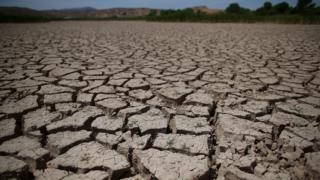

In [156]:
Image(data[4]['imagen'])

###Construccion de DataFrame

In [0]:
df = pd.DataFrame(data)
df

In [0]:
df.to_csv('BBC_News_Scraper')